In [1]:
%run uvms_forward_dynamics.ipynb

jit after {'jit': True, 'jit_options': {'flags': '-Ofast'}, 'compiler': 'shell'}
number of joints = 4
floating_base found
floating_base found
floating_base found
floating_base found
floating_base found
floating_base found


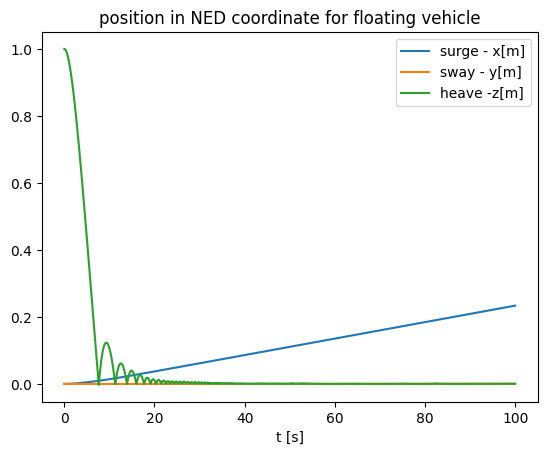

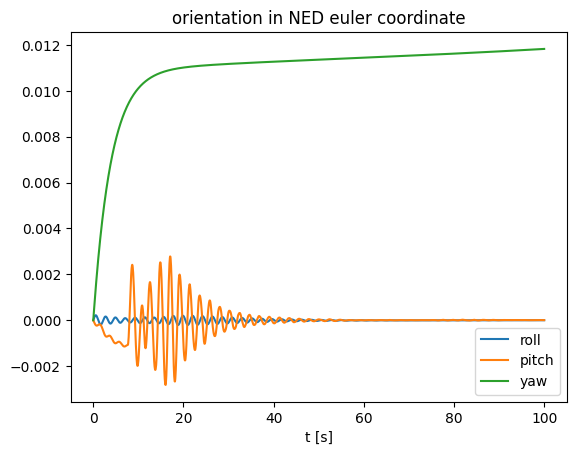

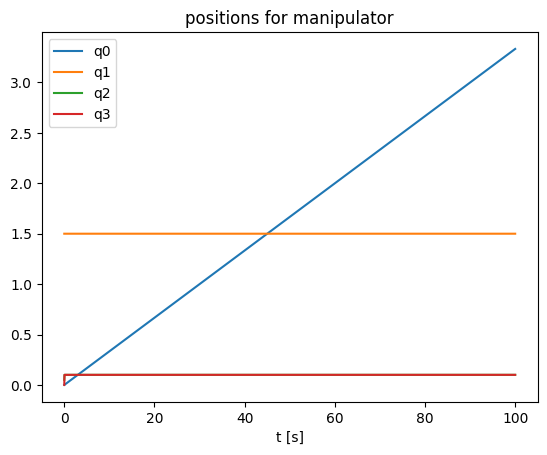

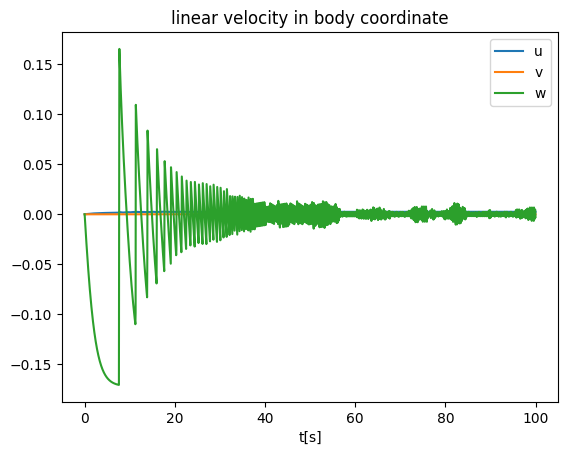

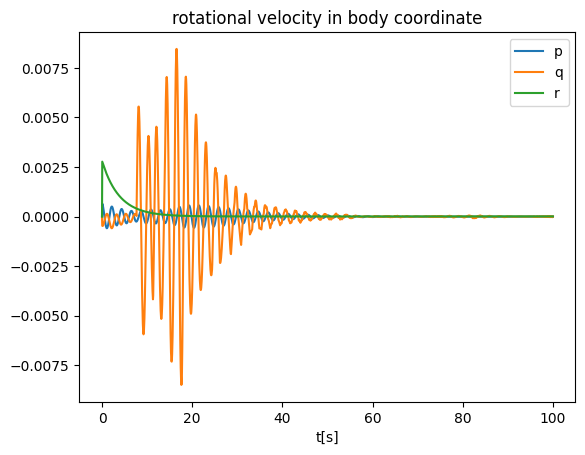

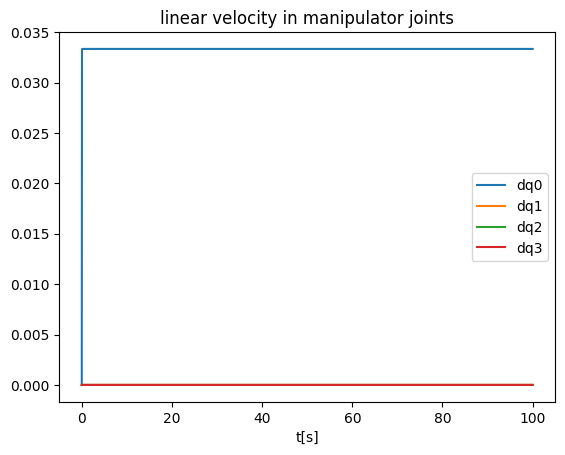

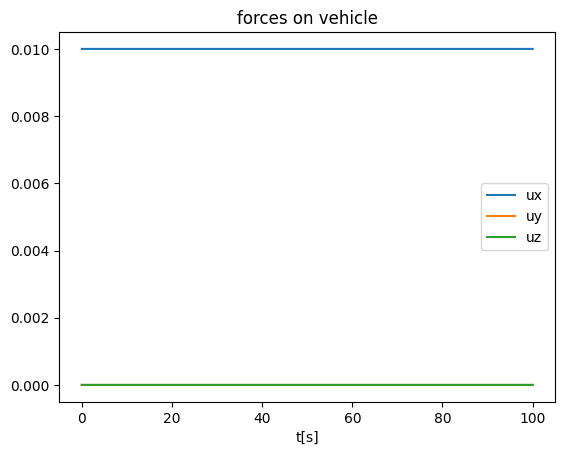

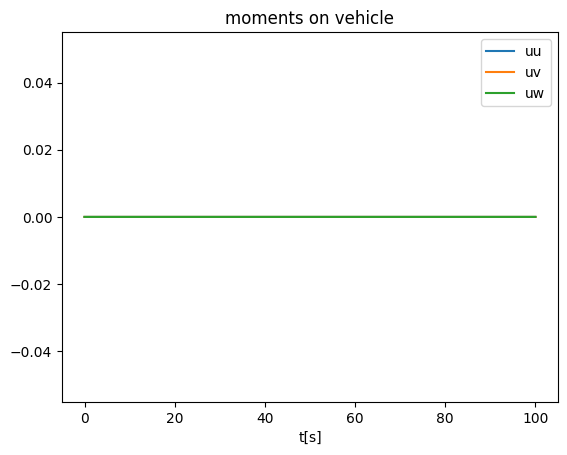

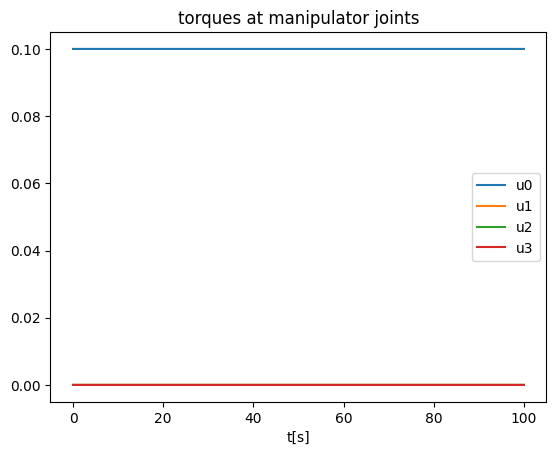

In [2]:
res = [np.zeros((20,alpha.N+1)), np.zeros((10,alpha.N+1))]
x0 = np.array([0, 0, 1, 0, 0, 0, 0.0, 1.5, 0.05, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) #x y z r p y q0 q1 q2 q3 u v w p q r qd0 qd1 qd2 qd3 qd4
u =  np.array([0.01, 0.0, 0, 0, 0, 0, 0.1, 0, 0, 0])
res[0][:,0] = x0
res[1][:,0] = u
t = np.linspace(0, alpha.sim_n, alpha.N+1)

for i in range(1, alpha.N+1):
  fx = UVMSnext_use_coupled(use_coupled, res[0][:,i-1], u, alpha.delta_t, blue.sim_p, alpha.sim_p,  alpha.base_T0, alpha.joint_min, alpha.joint_max)
  res[0][:,i] = fx[0].full().flatten()
  res[1][:,i] = fx[1].full().flatten()

# Create a figure and plot the data
plt.figure()
plt.plot(t, res[0][0:3,:].T)
plt.legend(['surge - x[m]', 'sway - y[m]', 'heave -z[m]'])
plt.title("position in NED coordinate for floating vehicle")
plt.xlabel('t [s]')

plt.figure()
plt.plot(t, res[0][3:6,:].T)
plt.legend(['roll', 'pitch', 'yaw'])
plt.title("orientation in NED euler coordinate")
plt.xlabel('t [s]')

plt.figure()
plt.plot(t, res[0][6:10,:].T)
plt.legend(['q0', 'q1', 'q2', 'q3'])
plt.title("positions for manipulator")
plt.xlabel('t [s]')

plt.figure()
plt.plot(t, res[0][10:13,:].T)
plt.legend(['u', 'v', 'w'])
plt.xlabel('t[s]')
plt.title("linear velocity in body coordinate")
plt.show()

plt.figure()
plt.plot(t, res[0][13:16,:].T)
plt.legend(['p', 'q', 'r'])
plt.xlabel('t[s]')
plt.title("rotational velocity in body coordinate")
plt.show()

plt.figure()
plt.plot(t, res[0][16:20,:].T)
plt.legend(['dq0', 'dq1', 'dq2', 'dq3'])
plt.xlabel('t[s]')
plt.title("linear velocity in manipulator joints")
plt.show()

plt.figure()
plt.plot(t, res[1][0:3,:].T)
plt.legend(['ux', 'uy', 'uz'])
plt.xlabel('t[s]')
plt.title("forces on vehicle")
plt.show()


plt.figure()
plt.plot(t, res[1][3:6,:].T)
plt.legend(['uu', 'uv', 'uw'])
plt.xlabel('t[s]')
plt.title("moments on vehicle")
plt.show()

plt.figure()
plt.plot(t, res[1][6:10,:].T)
plt.legend(['u0', 'u1', 'u2', 'u3'])
plt.xlabel('t[s]')
plt.title("torques at manipulator joints")
plt.show()